This notebook evaluates the effects of 1)crowding, 2) polydisperity and 3) closed boundaries on the distribution of collisions between ribosomes and tRNA.

It demonstrates that polydisperse crowding (as opposed to monodisperse crowding or dilute polydisperity) and closed boundaries are important for creating non-random distributions (at certain time scales).

In [43]:
from src import analysis_utils as utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Experiment 1:



Reached tRNA  2 . Completed counting collisions between tRNA  1  and ribosomes  [48 49 50 51 52 53 54]


<function matplotlib.pyplot.tight_layout>

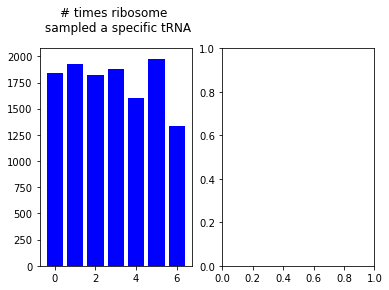

In [50]:
df = utils.readSimData("data/AM4S_expt10_47tRNAEfTuEfTu7ribosomev2.xls")
rib,timeavg=utils.countRibosomeCollisions(df, 1,np.arange(48,55) )

fig, ax = plt.subplots(1,2)
ax[0].bar([0,1,2,3,4,5,6],rib,color='b')
ax[0].set_title("# times ribosome \n sampled a specific tRNA",y=1.05)
plt.tight_layout